## Q3 - part A

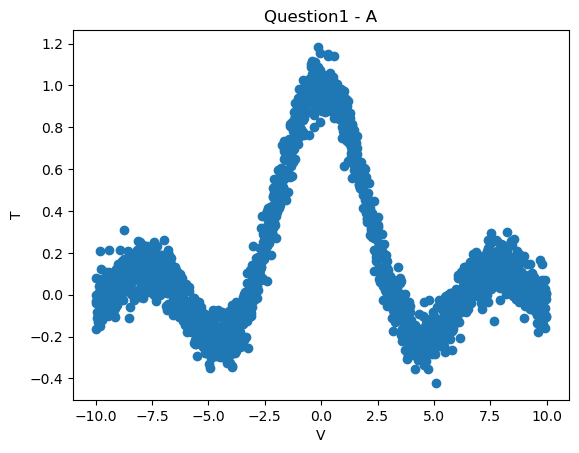

In [2]:
import copy
import math

import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

data = pd.read_csv('.\\Inputs\\aliasing.csv')


plt.title("Question1 - A")
plt.ylabel("T")
plt.xlabel("V")
plt.scatter(data['Variable'], data['Target'])
plt.show()

## Q3 - part C

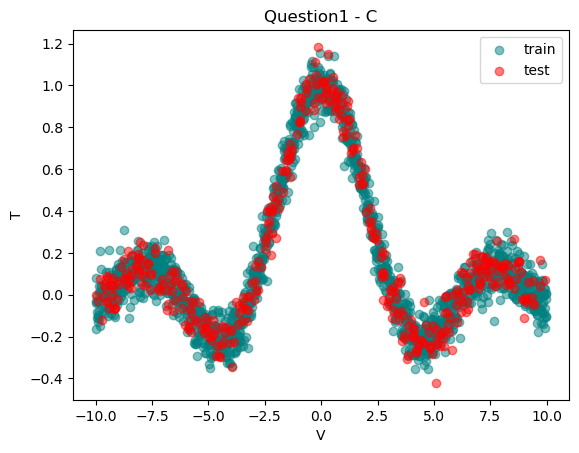

In [3]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

plt.title("Question1 - C")
plt.ylabel("T")
plt.xlabel("V")
plt.scatter(train_dataset['Variable'], train_dataset['Target'], alpha=0.5, label="train", color="teal")
plt.scatter(test_dataset['Variable'], test_dataset['Target'], alpha=0.5, label="test", color="red")
plt.legend()
plt.show()


## Q3 - part D

Error for iteration number  0  is:  0.15339006052675896
Error for iteration number  50  is:  0.0548545418420612
Error for iteration number  100  is:  0.05050016197059466
Error for iteration number  150  is:  0.047763112605576884
Error for iteration number  200  is:  0.045598717896826846
Error for iteration number  250  is:  0.04382921987654753
Error for iteration number  300  is:  0.0423764819107771
Error for iteration number  350  is:  0.04118317191625674
Error for iteration number  400  is:  0.04020288747586467
Error for iteration number  450  is:  0.039397582313290866
Error for iteration number  500  is:  0.038736011315543724
Error for iteration number  550  is:  0.038192509661112116
Error for iteration number  600  is:  0.03774599566446082
Error for iteration number  650  is:  0.03737915226591984
Error for iteration number  700  is:  0.03707775474791496
Error for iteration number  750  is:  0.036830118512464254
Error for iteration number  800  is:  0.03662664547429115
Error for ite

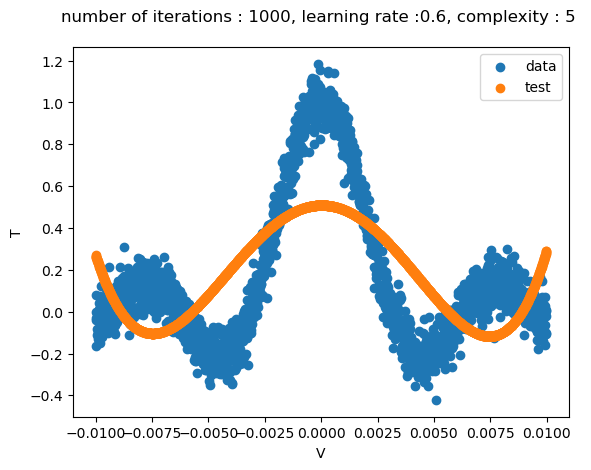

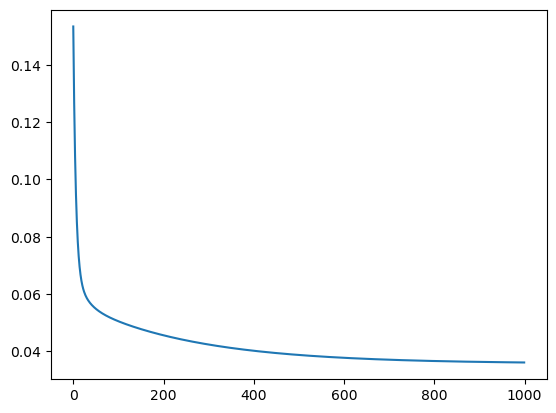

In [6]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b  # (n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i]) ** 2  # scalar
    cost = cost / (2 * m)  # scalar
    return cost


def scaling(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def gradient_estimation(X, y, w, b):
    try:
        m, n = X.shape  
        dj_dw = np.zeros((n,))
        dj_db = 0.
        for i in range(m):
            err = (np.dot(X[i], w) + b) - y[i]
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err * X[i, j]
            dj_db = dj_db + err
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        return dj_db, dj_dw
    except:
        m = X.shape[0]
        dj_dw = 0
        dj_db = 0
        for i in range(m):
            f_wb = w * X[i] + b
            dj_dw_i = (f_wb - y[i]) * X[i]
            dj_db_i = f_wb - y[i]
            dj_db += dj_db_i
            dj_dw += dj_dw_i
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        return dj_dw, dj_db

def RegressionTrainerGD(X, Y, learning_rate, iterations, degree,x_test=None):
    if not isinstance(X, np.ndarray):  # handle pandas dataframe
        X_train_base = X.to_numpy()
        y_train_base = Y.to_numpy()
    else:
        X_train_base = X
        y_train_base = Y
    X_train_base *= 0.1
    X_train = X_train_base.copy()
    Y_train = y_train_base

    for i in range(degree):
        if i == 0:
            continue
        if i == 1:
            temp = np.power(X_train_base, 2)
            temp = scaling(temp)
            X_train = numpy.vstack([X_train, temp])
            continue
        temp = np.power(X_train_base, i + 1)
        temp = scaling(temp)
        X_train = numpy.vstack([X_train, temp])
    X_train = X_train.transpose()
    initial_w = np.random.rand(degree)
    initial_b = 0.1
    w_final, b_final, J_hist = gradient_descent(X_train, Y_train, initial_w, initial_b,
                                                compute_cost, gradient_estimation,
                                                learning_rate, iterations)

    predict_list = []
    if x_test is None:
        for x in X_train:
            predicted = np.dot(x, w_final) + b_final
            predict_list.append(predicted)
    else:
        baseColumn = x_test
        final = x_test * 0.1
        for i in range(2, degree + 1):
            temp = np.power(baseColumn, i)
            temp = scaling(temp)
            temp = np.reshape(temp, (temp.shape[0], -1))
            final = np.reshape(final, (final.shape[0], -1))
            final = np.append(final, temp, axis=1)
        b_final_list = np.ones(x_test.shape[0]) * b_final
        predicted = np.matmul(final, w_final) + b_final_list
        return predicted, J_hist
    return predict_list, J_hist


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    first_alpha = alpha
    cost_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw  
        b = b - alpha * dj_db  
        if i < 100000: 
            cost_history.append(cost_function(X, y, w, b))
#         alpha = 39.9/(i + 94.5)
        if (i % 50 == 0):
            print("Error for iteration number ", i," is: " ,cost_history[-1])
    print("___________________________________________________________________________________________________")
    
    print("Best(min) error in last iteration is: ", cost_history[-1])
    
    print("___________________________________________________________________________________________________")
    return w, b, cost_history  


X=data['Variable']
Y=data['Target']
learning_rate=0.6
iterations=1000
degree=5
X_train = data['Variable']
Y_train = data['Target']

predictions, hist = RegressionTrainerGD(X, Y, learning_rate, iterations, degree)
plt.scatter(X_train, Y_train, label="data")
plt.scatter(X_train, predictions, label="test")
plt.title(
    f'number of iterations : {iterations}, learning rate :{learning_rate}, complexity : {degree} \n')
plt.xlabel("V")
plt.ylabel("T")
plt.legend()
plt.show()
series = np.arange(0, iterations, 1)
plt.plot(series, hist)
plt.show()


## Q3 - part E

Error for iteration number  0  is:  [0.06665497]
Error for iteration number  50  is:  [0.06665497]
___________________________________________________________________________________________________
Best(min) error in last iteration is:  [0.06665497]
___________________________________________________________________________________________________
Error for iteration number  0  is:  0.06543138975348677
Error for iteration number  50  is:  0.05299085365597419
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.05227270309930817
___________________________________________________________________________________________________
Error for iteration number  0  is:  0.07470555841170871
Error for iteration number  50  is:  0.05546068739992426
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.05361700642324501
_____

Error for iteration number  750  is:  0.048224097775605455
Error for iteration number  800  is:  0.04811056089368947
Error for iteration number  850  is:  0.04800561636778415
Error for iteration number  900  is:  0.04790808611556417
Error for iteration number  950  is:  0.047817015894617405
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.04773327907072798
___________________________________________________________________________________________________
Error for iteration number  0  is:  [0.06665497]
Error for iteration number  50  is:  [0.06665497]
Error for iteration number  100  is:  [0.06665497]
Error for iteration number  150  is:  [0.06665497]
Error for iteration number  200  is:  [0.06665497]
Error for iteration number  250  is:  [0.06665497]
Error for iteration number  300  is:  [0.06665497]
Error for iteration number  350  is:  [0.06665497]
Error for iteration number  400  is:  [0.066

Error for iteration number  1900  is:  0.0521421058518696
Error for iteration number  1950  is:  0.05214210581383247
Error for iteration number  2000  is:  0.052142105782045756
Error for iteration number  2050  is:  0.05214210575536807
Error for iteration number  2100  is:  0.05214210573288645
Error for iteration number  2150  is:  0.05214210571386674
Error for iteration number  2200  is:  0.05214210569771569
Error for iteration number  2250  is:  0.05214210568395153
Error for iteration number  2300  is:  0.0521421056721816
Error for iteration number  2350  is:  0.05214210566208375
Error for iteration number  2400  is:  0.05214210565339334
Error for iteration number  2450  is:  0.05214210564589132
Error for iteration number  2500  is:  0.05214210563939695
Error for iteration number  2550  is:  0.0521421056337588
Error for iteration number  2600  is:  0.052142105628851035
Error for iteration number  2650  is:  0.052142105624568016
Error for iteration number  2700  is:  0.052142105620820

Error for iteration number  3650  is:  0.05214436382523945
Error for iteration number  3700  is:  0.05214427565602242
Error for iteration number  3750  is:  0.05214419117893363
Error for iteration number  3800  is:  0.052144110194300604
Error for iteration number  3850  is:  0.05214403251562526
Error for iteration number  3900  is:  0.052143957968561444
Error for iteration number  3950  is:  0.052143886389983296
Error for iteration number  4000  is:  0.05214381762713749
Error for iteration number  4050  is:  0.05214375153686503
Error for iteration number  4100  is:  0.052143687984894264
Error for iteration number  4150  is:  0.0521436268451907
Error for iteration number  4200  is:  0.05214356799936225
Error for iteration number  4250  is:  0.05214351133611461
Error for iteration number  4300  is:  0.052143456750748905
Error for iteration number  4350  is:  0.05214340414470306
Error for iteration number  4400  is:  0.052143353425127194
Error for iteration number  4450  is:  0.0521433045

Error for iteration number  200  is:  0.04717943408345826
Error for iteration number  250  is:  0.0465365910062263
Error for iteration number  300  is:  0.046093499281792676
Error for iteration number  350  is:  0.04576247054737737
Error for iteration number  400  is:  0.045500990252097
Error for iteration number  450  is:  0.04528606047127622
Error for iteration number  500  is:  0.04510413949959848
Error for iteration number  550  is:  0.04494670052263954
Error for iteration number  600  is:  0.04480807700270382
Error for iteration number  650  is:  0.044684333988257614
Error for iteration number  700  is:  0.044572638008810214
Error for iteration number  750  is:  0.04447088599713993
Error for iteration number  800  is:  0.04437747660378336
Error for iteration number  850  is:  0.044291163666914476
Error for iteration number  900  is:  0.04421095910720676
Error for iteration number  950  is:  0.04413606666049838
Error for iteration number  1000  is:  0.044065835476412026
Error for i

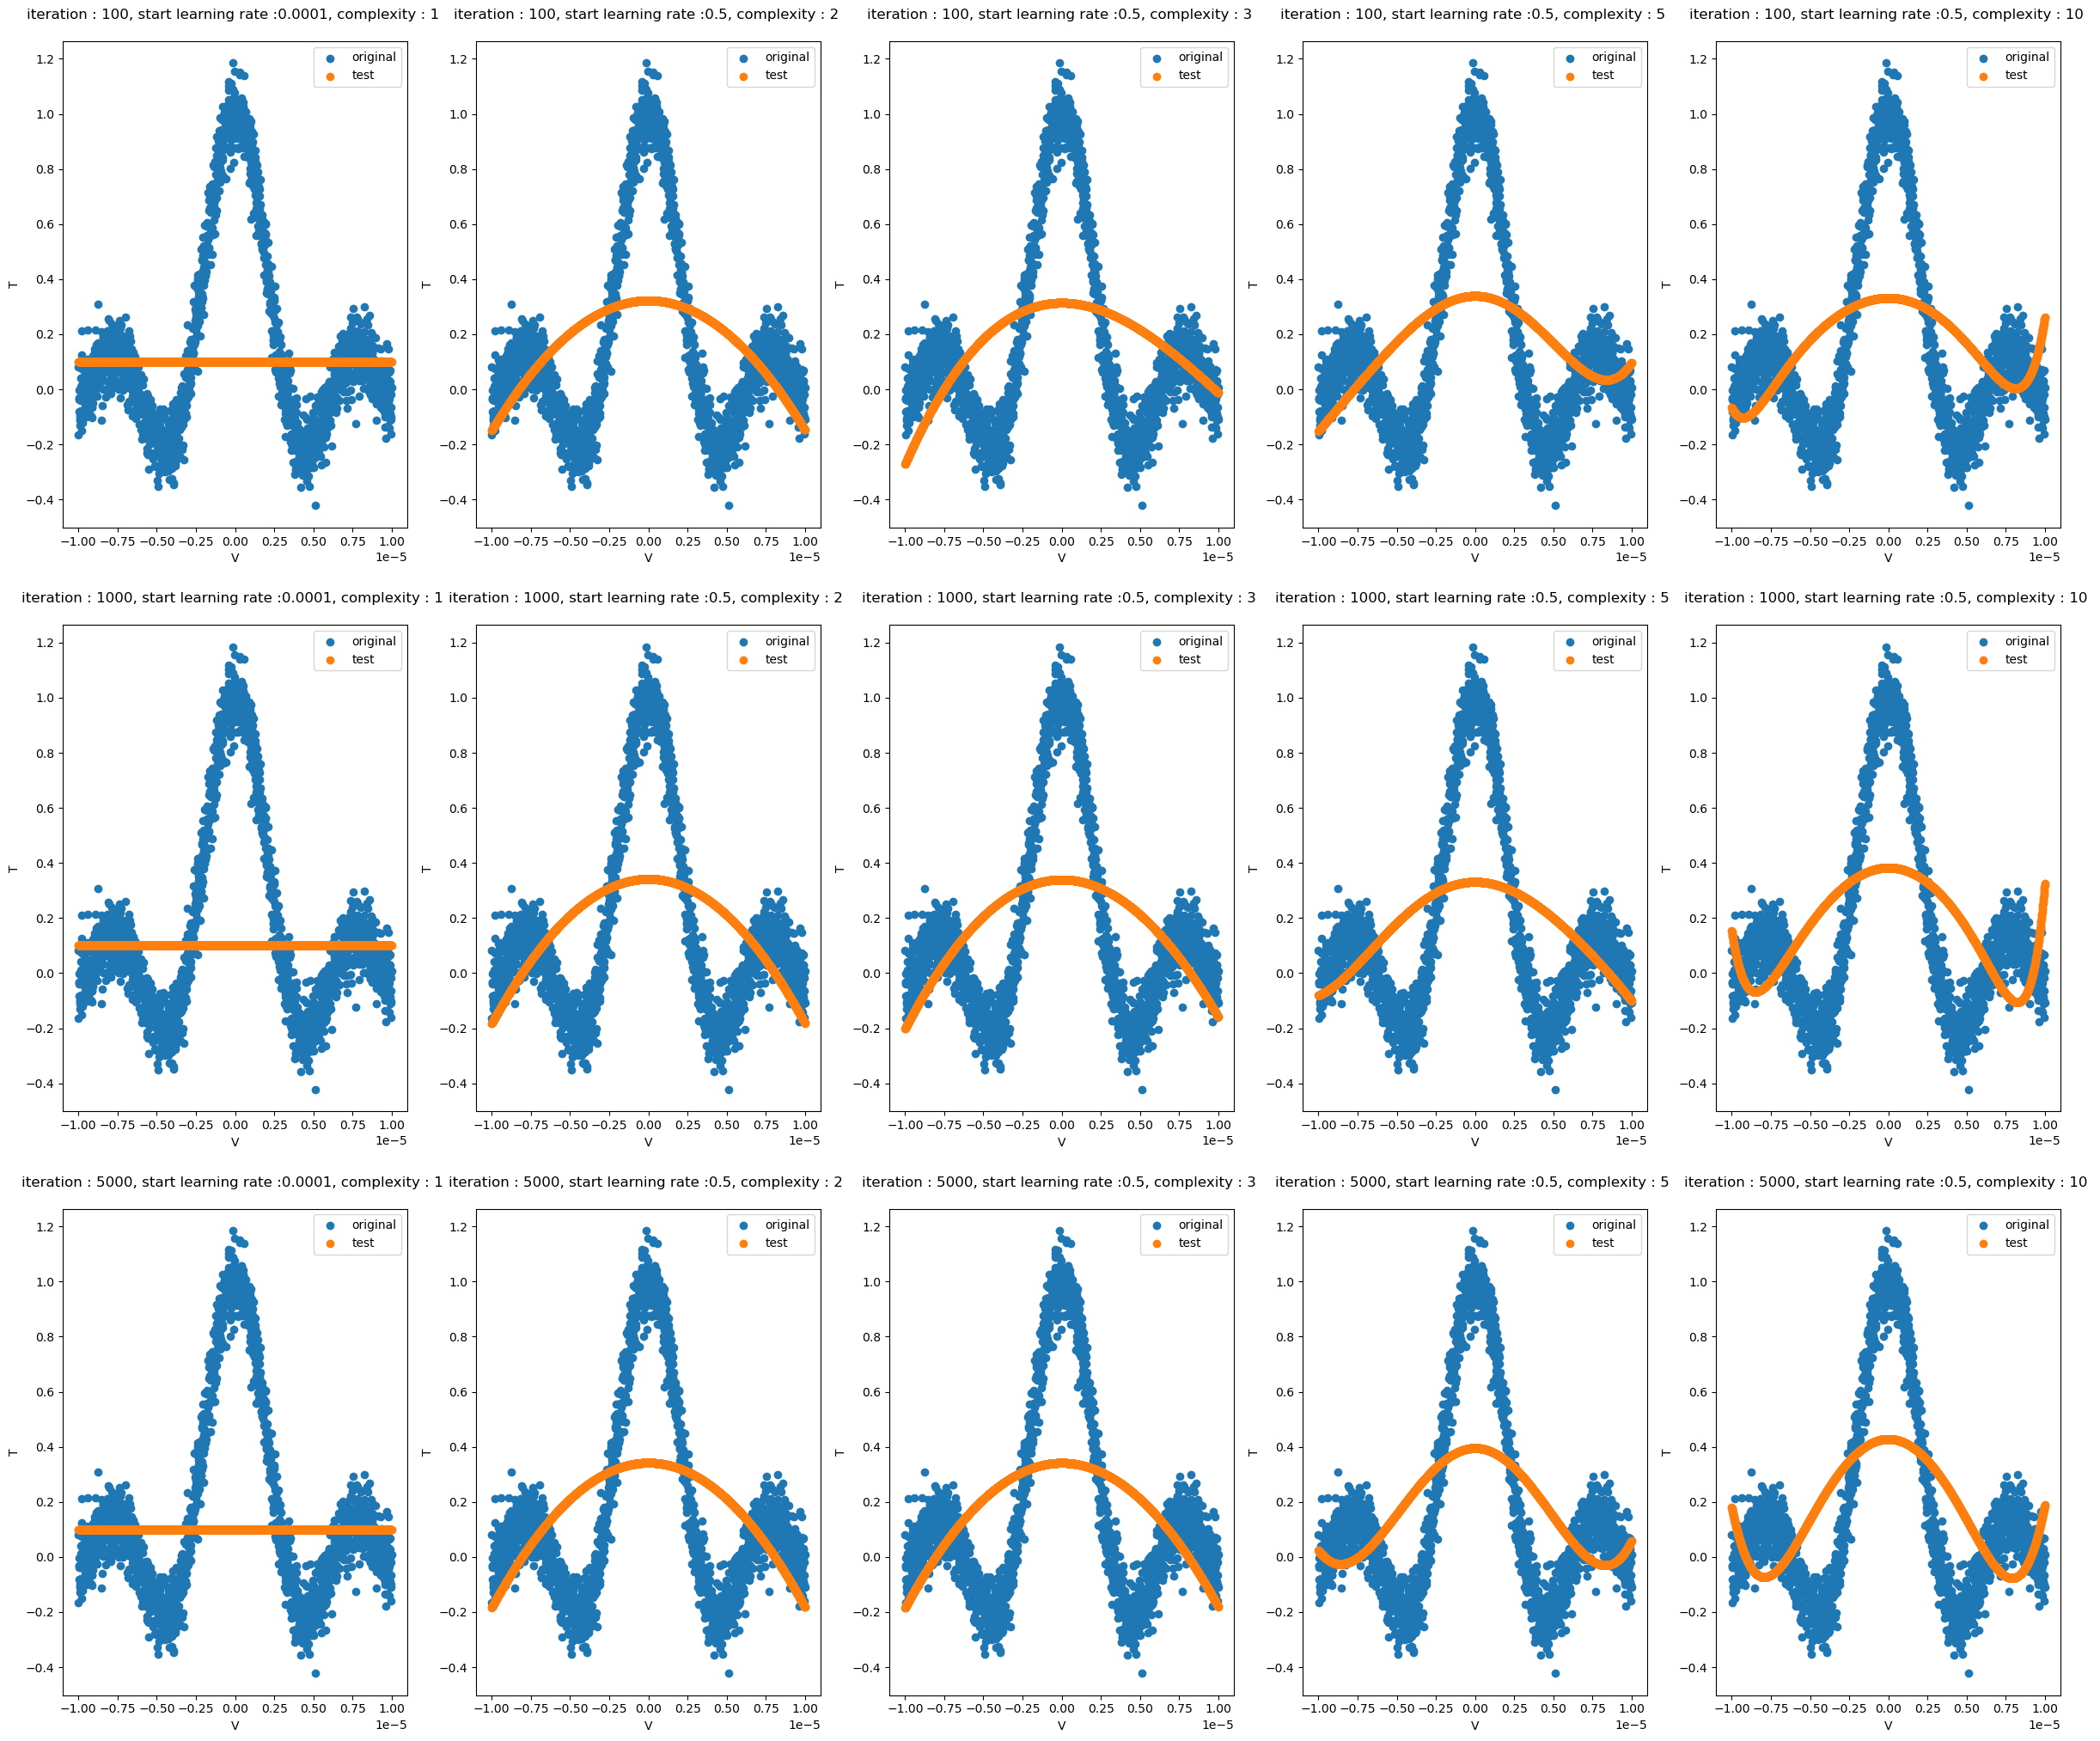

Error for iteration number  0  is:  [0.06665497]
Error for iteration number  50  is:  [0.06665497]
___________________________________________________________________________________________________
Best(min) error in last iteration is:  [0.06665497]
___________________________________________________________________________________________________
Error for iteration number  0  is:  0.08720245313444501
Error for iteration number  50  is:  0.05435232482529677
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.052482193698972016
___________________________________________________________________________________________________
Error for iteration number  0  is:  0.09440647947412985
Error for iteration number  50  is:  0.054784285690273785
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.05262279448668422
___

Error for iteration number  750  is:  0.043260805050714064
Error for iteration number  800  is:  0.04316516543733201
Error for iteration number  850  is:  0.04307698129534994
Error for iteration number  900  is:  0.04299522033309279
Error for iteration number  950  is:  0.04291904582531406
___________________________________________________________________________________________________
Best(min) error in last iteration is:  0.04284915225022098
___________________________________________________________________________________________________
Error for iteration number  0  is:  [0.06665497]
Error for iteration number  50  is:  [0.06665497]
Error for iteration number  100  is:  [0.06665497]
Error for iteration number  150  is:  [0.06665497]
Error for iteration number  200  is:  [0.06665497]
Error for iteration number  250  is:  [0.06665497]
Error for iteration number  300  is:  [0.06665497]
Error for iteration number  350  is:  [0.06665497]
Error for iteration number  400  is:  [0.0666

Error for iteration number  1900  is:  0.05214210564353861
Error for iteration number  1950  is:  0.05214210563574961
Error for iteration number  2000  is:  0.0521421056292405
Error for iteration number  2050  is:  0.05214210562377757
Error for iteration number  2100  is:  0.05214210561917368
Error for iteration number  2150  is:  0.05214210561527902
Error for iteration number  2200  is:  0.05214210561197168
Error for iteration number  2250  is:  0.05214210560915328
Error for iteration number  2300  is:  0.052142105606742976
Error for iteration number  2350  is:  0.052142105604675165
Error for iteration number  2400  is:  0.05214210560289553
Error for iteration number  2450  is:  0.05214210560135932
Error for iteration number  2500  is:  0.05214210560002943
Error for iteration number  2550  is:  0.052142105598874874
Error for iteration number  2600  is:  0.05214210559786991
Error for iteration number  2650  is:  0.052142105596992776
Error for iteration number  2700  is:  0.052142105596

Error for iteration number  3650  is:  0.0521425254075629
Error for iteration number  3700  is:  0.05214249119763748
Error for iteration number  3750  is:  0.05214245842027329
Error for iteration number  3800  is:  0.0521424269979958
Error for iteration number  3850  is:  0.052142396858443164
Error for iteration number  3900  is:  0.05214236793396766
Error for iteration number  3950  is:  0.05214234016127623
Error for iteration number  4000  is:  0.05214231348109887
Error for iteration number  4050  is:  0.0521422878378897
Error for iteration number  4100  is:  0.052142263179550716
Error for iteration number  4150  is:  0.052142239457179655
Error for iteration number  4200  is:  0.05214221662483998
Error for iteration number  4250  is:  0.05214219463934887
Error for iteration number  4300  is:  0.0521421734600827
Error for iteration number  4350  is:  0.05214215304879915
Error for iteration number  4400  is:  0.05214213336947203
Error for iteration number  4450  is:  0.0521421143881404

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_2512\3712736513.py:12: RuntimeWarning: invalid value encountered in true_divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))


Error for iteration number  50  is:  nan
Error for iteration number  100  is:  nan
Error for iteration number  150  is:  nan
Error for iteration number  200  is:  nan
Error for iteration number  250  is:  nan
Error for iteration number  300  is:  nan
Error for iteration number  350  is:  nan
Error for iteration number  400  is:  nan
Error for iteration number  450  is:  nan
Error for iteration number  500  is:  nan
Error for iteration number  550  is:  nan
Error for iteration number  600  is:  nan
Error for iteration number  650  is:  nan
Error for iteration number  700  is:  nan
Error for iteration number  750  is:  nan
Error for iteration number  800  is:  nan
Error for iteration number  850  is:  nan
Error for iteration number  900  is:  nan
Error for iteration number  950  is:  nan
Error for iteration number  1000  is:  nan
Error for iteration number  1050  is:  nan
Error for iteration number  1100  is:  nan
Error for iteration number  1150  is:  nan
Error for iteration number  120

In [7]:

X=data['Variable']
Y=data['Target']
learning_rate=0.5
X_train = data['Variable'].copy()
Y_train = data['Target'].copy()
fig, axis = plt.subplots(3, 5, figsize=(30, 25), sharey=False)
iteration_list = [100, 1000, 5000]
degrees = [1, 2, 3, 5, 10]
for i in range(len(iteration_list)):
    for j in range(len(degrees)):
        if j == 0:
            predictions, hist = RegressionTrainerGD(X, Y, 0.0001, iteration_list[i], degrees[j])
            axis[i, j].scatter(X_train * 10, Y_train, label="original")
            axis[i, j].scatter(X_train * 10, predictions, label="test")
            axis[i, j].title.set_text(
                f'iteration : {iteration_list[i]}, start learning rate :{0.0001}, complexity : {degrees[j]} \n')
            axis[i, j].set_xlabel("V")
            axis[i, j].set_ylabel("T")
            axis[i, j].legend()
        else:
            predictions, hist = RegressionTrainerGD(X, Y, learning_rate, iteration_list[i], degrees[j])
            axis[i, j].scatter(X_train * 10, Y_train, label="original")
            axis[i, j].scatter(X_train * 10, predictions, label="test")
            axis[i, j].title.set_text(
                f'iteration : {iteration_list[i]}, start learning rate :{learning_rate}, complexity : {degrees[j]} \n')
            axis[i, j].set_xlabel("V")
            axis[i, j].set_ylabel("T")
            axis[i, j].legend()
plt.show()

for i in range(len(iteration_list)):
    for j in range(len(degrees)):
        if j == 0:
            linear_learning_rate = 0.0001
            predictions, hist = RegressionTrainerGD(X, Y, linear_learning_rate, iteration_list[i], degrees[j])

            axis[i, j].title.set_text(
                f'iteration : {iteration_list[i]}, start learning rate :{linear_learning_rate}, complexity : {degrees[j]} \n'
                f' error : {hist[-1]}')
            series = np.arange(0, iteration_list[i], 1)
            axis[i, j].plot(series, hist)

            axis[i, j].set_xlabel("iteration")
            axis[i, j].set_ylabel("error")
        else:
            predictions, hist = RegressionTrainerGD(X, Y, learning_rate, iteration_list[i], degrees[j])

            axis[i, j].title.set_text(
                f'iteration : {iteration_list[i]}, start learning rate :{learning_rate}, complexity : {degrees[j]} \n'
                f' error : {hist[-1]}')
            series = np.arange(0, iteration_list[i], 1)
            axis[i, j].plot(series, hist)

            axis[i, j].set_xlabel("iteration")
            axis[i, j].set_ylabel("error")
plt.show()




## Q3 - part F

Error for iteration number  0  is:  0.324560380525744
Error for iteration number  50  is:  0.05251417780316707
Error for iteration number  100  is:  0.04658475838355615
Error for iteration number  150  is:  0.04352080204816169
Error for iteration number  200  is:  0.04182026784258296
Error for iteration number  250  is:  0.04081254146509812
Error for iteration number  300  is:  0.04015878455974363
Error for iteration number  350  is:  0.03968668917393558
Error for iteration number  400  is:  0.039308586623390165
Error for iteration number  450  is:  0.038979853650772986
Error for iteration number  500  is:  0.038677760980507
Error for iteration number  550  is:  0.03839071650468079
Error for iteration number  600  is:  0.038112794590312526
Error for iteration number  650  is:  0.037840953647355034
Error for iteration number  700  is:  0.03757362083479468
Error for iteration number  750  is:  0.03730997205453671
Error for iteration number  800  is:  0.03704956556446512
Error for iterati

Error for iteration number  6950  is:  0.019126588105092546
Error for iteration number  7000  is:  0.019054958641294226
Error for iteration number  7050  is:  0.018984068140735087
Error for iteration number  7100  is:  0.018913908979884497
Error for iteration number  7150  is:  0.018844473613860394
Error for iteration number  7200  is:  0.0187757545756175
Error for iteration number  7250  is:  0.018707744475144703
Error for iteration number  7300  is:  0.018640435998670133
Error for iteration number  7350  is:  0.01857382190787465
Error for iteration number  7400  is:  0.01850789503911348
Error for iteration number  7450  is:  0.018442648302645744
Error for iteration number  7500  is:  0.01837807468187214
Error for iteration number  7550  is:  0.018314167232580288
Error for iteration number  7600  is:  0.018250919082198176
Error for iteration number  7650  is:  0.018188323429054458
Error for iteration number  7700  is:  0.018126373541647797
Error for iteration number  7750  is:  0.0180

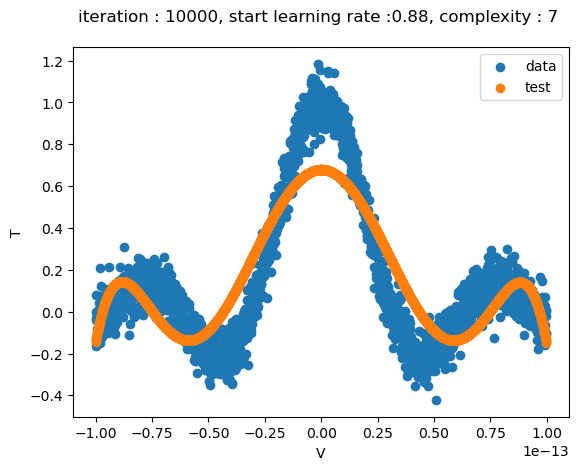

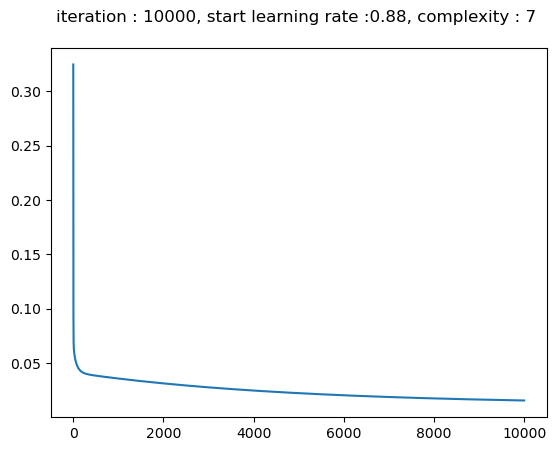

In [16]:

X=data['Variable']
Y=data['Target']
learning_rate=0.88
iterations=10000
degree=7
X_train = data['Variable']
Y_train = data['Target']

predictions, hist = RegressionTrainerGD(X, Y, learning_rate, iterations, degree)


plt.scatter(X_train, Y_train, label="data")
plt.scatter(X_train, predictions, label="test")
plt.title(
    f'iteration : {iterations}, start learning rate :{learning_rate}, complexity : {degree} \n')
plt.xlabel("V")
plt.ylabel("T")
plt.legend()
plt.show()


plt.title(
    f'iteration : {iterations}, start learning rate :{learning_rate}, complexity : {degree} \n' )
series = np.arange(0, iterations, 1)
plt.plot(series, hist)
plt.show()



## Q3 - Part G

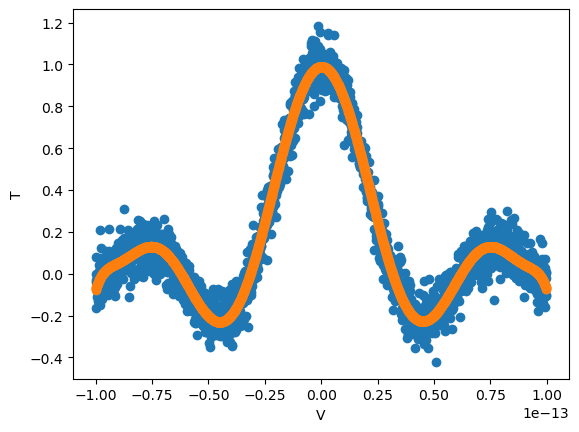

In [43]:

def error_estimator(t, p):
    m = t.shape[0]
    t = np.reshape(t, (t.shape[0], 1))
    p = np.reshape(p, (p.shape[0], 1))
    distance = t - p
    distance = np.power(distance, 2)
    sumsquare = np.sum(distance)
    mse_error = sumsquare / m
    return mse_error

degree=10
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
bias = np.ones((x.shape[0], 1))
x = np.reshape(x, (x.shape[0], 1)) 
temp = x
for i in range(1, degree):
    x = np.append(x, np.power(temp, i + 1), axis=1)
final_x = np.append(bias, x, axis=1)
x_transpose = np.transpose(final_x)  
x_transpose_dot_x = x_transpose.dot(final_x)  
t_1 = np.linalg.inv(x_transpose_dot_x)
t_2 = x_transpose.dot(y) 
co__efficents = t_1.dot(t_2)
co__efficents = np.reshape(co__efficents, (co__efficents.shape[0], 1))
final = np.matmul(final_x, co__efficents)
plt.scatter(data['Variable'], data['Target'], label="data")
plt.scatter(data['Variable'], final, label="test")
plt.xlabel("V")
plt.ylabel("T")
plt.show()


## Q3 - Part H

Error for iteration number  0  is:  0.09580149094967819
Error for iteration number  50  is:  0.0525973508539302
Error for iteration number  100  is:  0.04808357520214957
Error for iteration number  150  is:  0.0448670174319285
Error for iteration number  200  is:  0.042471752416945924
Error for iteration number  250  is:  0.04068004141689194
Error for iteration number  300  is:  0.03933920273146628
Error for iteration number  350  is:  0.03833573279412553
Error for iteration number  400  is:  0.03758474286858463
Error for iteration number  450  is:  0.03702270698359648
Error for iteration number  500  is:  0.0366020830325463
Error for iteration number  550  is:  0.03628729083923301
Error for iteration number  600  is:  0.036051702435943835
Error for iteration number  650  is:  0.03587538962722219
Error for iteration number  700  is:  0.035743438282905486
Error for iteration number  750  is:  0.03564468676625032
Error for iteration number  800  is:  0.03557078178186233
Error for iterati

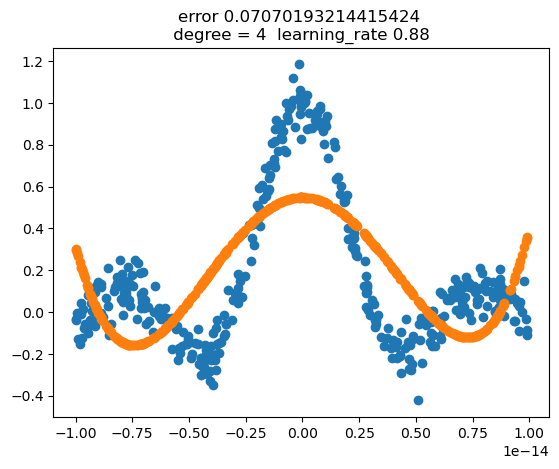

Error for iteration number  0  is:  0.12422118160036741
Error for iteration number  50  is:  0.0512942846610648
Error for iteration number  100  is:  0.0470147301379654
Error for iteration number  150  is:  0.044273893843221244
Error for iteration number  200  is:  0.0422454692949293
Error for iteration number  250  is:  0.04071666455603845
Error for iteration number  300  is:  0.03956200102381806
Error for iteration number  350  is:  0.03868970809390532
Error for iteration number  400  is:  0.03803071478936756
Error for iteration number  450  is:  0.03753286195364217
Error for iteration number  500  is:  0.03715674655048173
Error for iteration number  550  is:  0.03687260073079547
Error for iteration number  600  is:  0.036657935639897214
Error for iteration number  650  is:  0.03649576150928804
Error for iteration number  700  is:  0.03637324299204659
Error for iteration number  750  is:  0.03628068330320616
Error for iteration number  800  is:  0.03621075676319301
Error for iteratio

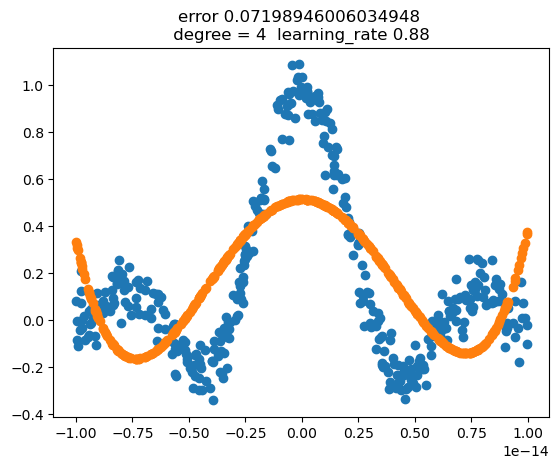

Error for iteration number  0  is:  0.12068550671303159
Error for iteration number  50  is:  0.04809501564135415
Error for iteration number  100  is:  0.04488490468782148
Error for iteration number  150  is:  0.04262227580887339
Error for iteration number  200  is:  0.040964342217847165
Error for iteration number  250  is:  0.03974517985350383
Error for iteration number  300  is:  0.03884838396913086
Error for iteration number  350  is:  0.03818869695218628
Error for iteration number  400  is:  0.037703427044048776
Error for iteration number  450  is:  0.037346459375194284
Error for iteration number  500  is:  0.037083871654380325
Error for iteration number  550  is:  0.03689071043205863
Error for iteration number  600  is:  0.036748619790123456
Error for iteration number  650  is:  0.03664409699676377
Error for iteration number  700  is:  0.03656720935530521
Error for iteration number  750  is:  0.03651065030996176
Error for iteration number  800  is:  0.036469045111135495
Error for i

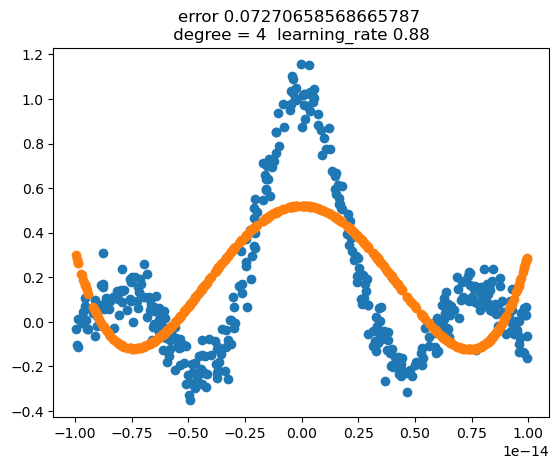

Error for iteration number  0  is:  0.1049260733593356
Error for iteration number  50  is:  0.054051564428497095
Error for iteration number  100  is:  0.048645811942270197
Error for iteration number  150  is:  0.04501144458548348
Error for iteration number  200  is:  0.04234537400194291
Error for iteration number  250  is:  0.04036931016270793
Error for iteration number  300  is:  0.03890297415468822
Error for iteration number  350  is:  0.03781474061559318
Error for iteration number  400  is:  0.03700710221702352
Error for iteration number  450  is:  0.036407708057681266
Error for iteration number  500  is:  0.03596286365336353
Error for iteration number  550  is:  0.03563271938202294
Error for iteration number  600  is:  0.03538770058650222
Error for iteration number  650  is:  0.035205858236400524
Error for iteration number  700  is:  0.03507090271096358
Error for iteration number  750  is:  0.03497074455838894
Error for iteration number  800  is:  0.034896411510559416
Error for ite

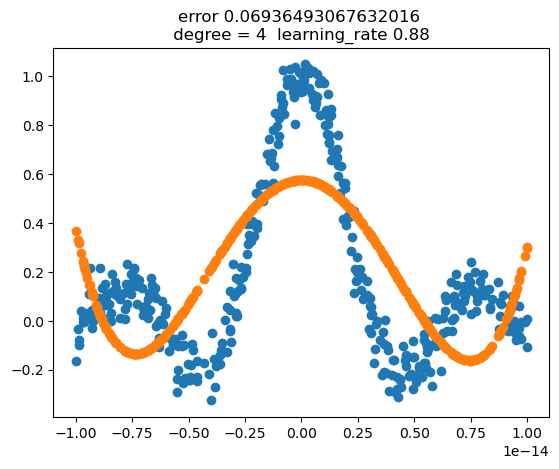

Error for iteration number  0  is:  0.13942255609236204
Error for iteration number  50  is:  0.05119272736145477
Error for iteration number  100  is:  0.046909692520289495
Error for iteration number  150  is:  0.04395618365499243
Error for iteration number  200  is:  0.0417283953418241
Error for iteration number  250  is:  0.040031324690499866
Error for iteration number  300  is:  0.03873720808712641
Error for iteration number  350  is:  0.03775026232254209
Error for iteration number  400  is:  0.03699756915693453
Error for iteration number  450  is:  0.03642352783521313
Error for iteration number  500  is:  0.0359857352614992
Error for iteration number  550  is:  0.03565185278177983
Error for iteration number  600  is:  0.03539721732860152
Error for iteration number  650  is:  0.03520301961544696
Error for iteration number  700  is:  0.03505491474110896
Error for iteration number  750  is:  0.0349419625675411
Error for iteration number  800  is:  0.03485581959911599
Error for iteratio

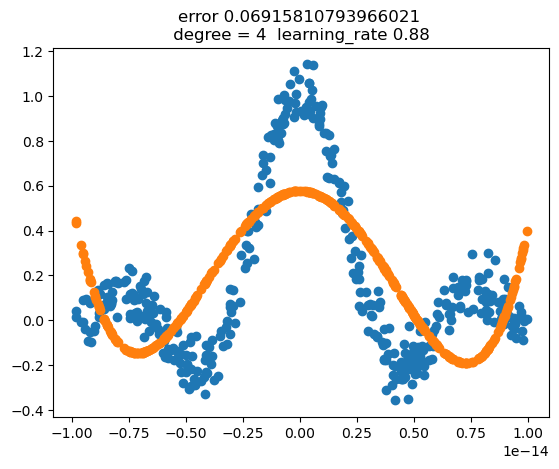

Expected Error  : 0.0707842033014284


In [51]:
errors = 0
K=5
degree=4
learning_rate=0.88
iterations=2500
current_data = data.copy()
m = data.shape[0]
k_size = int(m / K)
k_parts = []
for j in range(5):
    k_parts.append(current_data.iloc[j * k_size: k_size + j * k_size, :].values)
    train = None
    test = None
    train = k_parts[j]
    test = k_parts[j]
    train_x = train[:, 0]  
    train_y = train[:, 1]  
    test_x = test[:, 0]  
    test_y = test[:, 1]  
    pred, hist = RegressionTrainerGD(train_x, train_y, x_test=test_x, learning_rate=learning_rate,
                                     iterations=iterations,
                                     degree=degree)

    err = error_estimator(test_y, pred)
    errors += err
    print(f'iteration err {err}')
    plt.title(f'error {err} \n degree = {degree}  learning_rate {learning_rate} ')
    plt.scatter(test_x, test_y)
    plt.scatter(test_x, pred)
    plt.show()
errors /= K
print(f'Expected Error  : {errors}')
    
